#https://www.kaggle.com/gayatris/coronatweetanalysisandsummarization/data?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#To display plots inline; within the notebook window
%matplotlib inline

In [4]:
dataset = pd.read_csv('C:/Users/saksh/OneDrive/Desktop/Sentiment Dashboard\Analysis/2020-04-28 Coronavirus Tweets.csv')

In [5]:
dataset.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

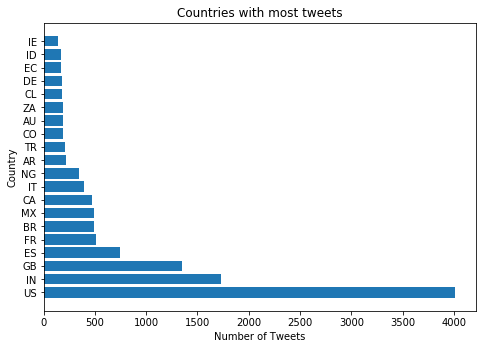

In [6]:
#Countries with most tweets

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# count the occurrence of each class 
data = dataset["country_code"].value_counts() 
# get x and y data 
points = data.index[:20]
frequency = data.values[:20]
#plot graph
ax.barh(points,frequency)
plt.title("Countries with most tweets")
plt.xlabel("Number of Tweets")
plt.ylabel("Country")
plt.show()

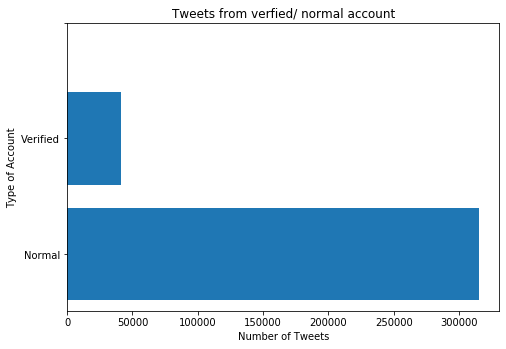

In [7]:
#Tweets from verfied/ normal account

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# count the occurrence of each class 
data = dataset["verified"].value_counts() 
# get x and y data 
points = data.index
frequency = data.values
#plot graph
ax.barh(points,frequency)
ax.set_yticks([0,1,2])
ax.set_yticklabels(["Normal","Verified"])
plt.xlabel("Number of Tweets")
plt.ylabel("Type of Account")
plt.title("Tweets from verfied/ normal account")
plt.show()

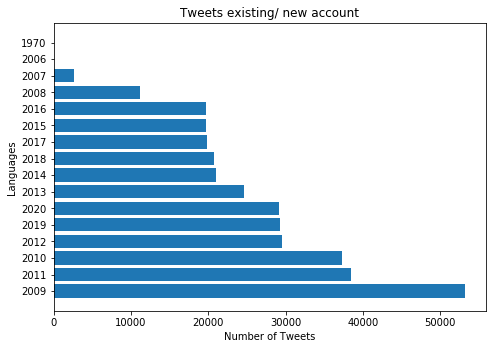

In [8]:
#Tweets existing/ new account

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# count the occurrence of each class 
temp_data = dataset.copy()
temp_data["account_created_at"] = [i[:4] for i in temp_data["account_created_at"]]
data = temp_data["account_created_at"].value_counts() 
# get x and y data 
points = data.index
frequency = data.values
#plot graph
ax.barh(points,frequency)
ax.set_yticklabels(data.index)
plt.xlabel("Number of Tweets")
plt.ylabel("Languages")
plt.title("Tweets existing/ new account")
plt.show()


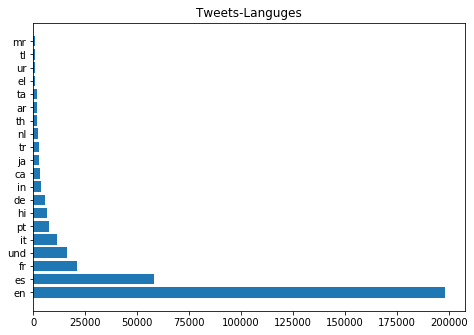

In [9]:
#Tweets-languages

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# count the occurrence of each class 
data = dataset["lang"].value_counts() 
# get x and y data 
points = data.index[:20]
frequency = data.values[:20]
#plot graph
ax.barh(points,frequency)
plt.title("Tweets-Languges")
plt.show()

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#Extracting English Tweets of all countries
tweets= dataset[["text","country_code"]][dataset['lang'] == 'en'].reset_index()
tweets.drop(["index"],axis=1)

#maintain a copy of original tweets before processing it
tweets_original = tweets.copy()

In [12]:
#Retaining only alphabets (removing all punctuations and numbers)
tweets["text"] = [re.sub('[^a-zA-Z]', ' ',i) for i in tweets["text"]]

#Converting into lower case 
tweets["text"] = [i.lower() for i in tweets["text"]]

#Removing Emoticons
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
tweets["text"]  = [deEmojify(i) for i in tweets["text"] ]


#Removing URLs
def removeURLs(str):
    ans = ""
    clean_tweet1 = re.match('(.*?)http.*?\s?(.*?)', str)
    clean_tweet2 = re.match('(.*?)https.*?\s?(.*?)', str)
    if clean_tweet1:
        ans=ans+clean_tweet1.group(1)
        ans=ans+clean_tweet1.group(2)
    elif clean_tweet2: 
        ans=ans+clean_tweet2.group(1)
        ans=ans+clean_tweet2.group(2)
    else:
        ans = str
    return ans


tweets["text"] = tweets["text"].apply(lambda tweet: removeURLs(tweet))


#Removing Stop Words
cachedStopWords = set(stopwords.words("english"))
tweets["text"] = tweets["text"].apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in cachedStopWords]))

#Define words that we do not want to Stem or Lemmatize
specialWords = ["coronavirus", "covid","quarantine","coronavirusoutbreak","virus","corona","lockdown"]

#Stemming
ps = PorterStemmer()
def stemWords(word):
    if word in specialWords:
            return word
    else:
        return ps.stem(word)
        
tweets["text"] = tweets["text"].apply(lambda tweet: ' '.join([stemWords(word) for word in tweet.split()]))


#Lemmatization: 
wnl = WordNetLemmatizer()
def lemmatizeWords(word):
    if word in specialWords:
            return word
    else:
        return wnl.lemmatize(word)
tweets["text"] = tweets["text"].apply(lambda tweet: ' '.join([lemmatizeWords(word) for word in tweet.split()]))


#Preparing corpus
corpus=[]
corpus = [word for tweet in tweets["text"] for word in tweet.split()]

{'amp': 25515, 'case': 16921, 'coronavirus': 72506, 'covid': 155644, 'day': 10718, 'death': 13358, 'get': 10855, 'go': 8544, 'health': 10309, 'help': 12148, 'home': 9444, 'like': 9139, 'live': 9322, 'lockdown': 11099, 'make': 7200, 'need': 10828, 'new': 14392, 'one': 9787, 'pandem': 16931, 'peopl': 15979, 'say': 7895, 'state': 7357, 'support': 7819, 'take': 7193, 'test': 13110, 'time': 11866, 'today': 9740, 'trump': 7324, 'work': 11250, 'worker': 8250}


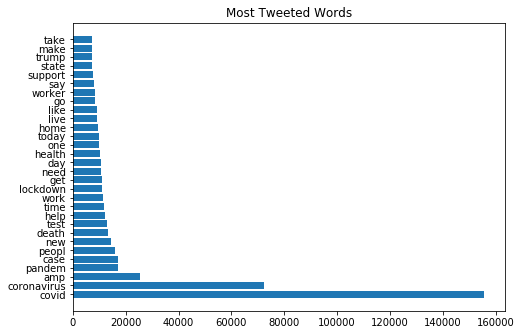

In [13]:
#Using Bag of Words
from operator import itemgetter  
vectorizer = CountVectorizer(max_features = 30)
cv = vectorizer.fit_transform(tweets["text"]).toarray()
terms = vectorizer.get_feature_names()
freqs = cv.sum(axis=0)
result = dict(zip(terms, freqs))
print(result)
features = []
vals = []
for key, value in sorted(result.items(), key = itemgetter(1), reverse = True):
    features.append(key)
    vals.append(value)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# get x and y data 
points = features
frequency = vals
#plot graph
ax.barh(points,frequency)
plt.title("Most Tweeted Words")
plt.show()

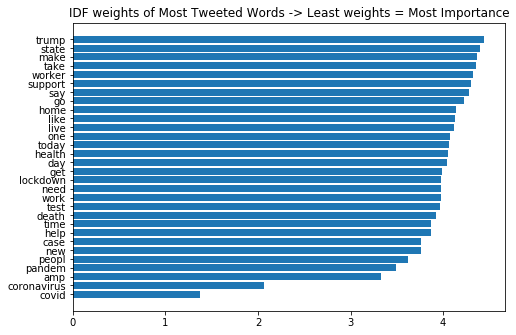

In [14]:
#Using Term Frequency (TF-IDF)

tf=TfidfTransformer(smooth_idf=True,use_idf=True)
tf.fit(cv)

# print idf values
data = { "Word" :vectorizer.get_feature_names(), "idf_weights":tf.idf_}
df_idf = pd.DataFrame(data)
 
# sort ascending
df_idf = df_idf.sort_values(by=['idf_weights'])


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# get x and y data 
points = df_idf["Word"]
frequency = df_idf["idf_weights"]
#plot graph
ax.barh(points,frequency)
plt.title("IDF weights of Most Tweeted Words -> Least weights = Most Importance")
plt.show()

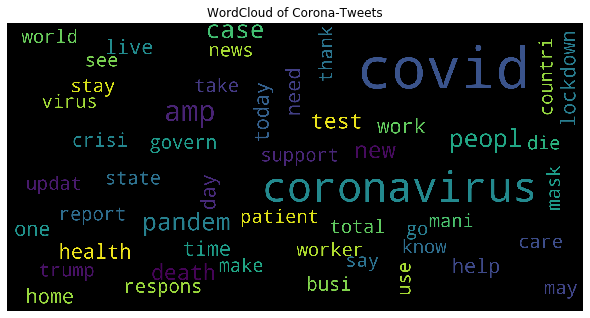

In [15]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(corpus))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor="None") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("WordCloud of Corona-Tweets")
plt.tight_layout(pad = 0) 
plt.show()

In [16]:
s = SentimentIntensityAnalyzer()
scores = tweets["text"].apply(lambda tweet: s.polarity_scores(tweet))
scores_df = pd.DataFrame(list(scores))
scores_df.head()


,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,1.000,0.000,0.0000
2,0.0,1.000,0.000,0.0000
3,0.0,0.816,0.184,0.4019
4,0.0,1.000,0.000,0.0000


In [17]:
#Calculating sentiments for all tweets
scores_df['result'] = scores_df['compound'].apply(lambda res: 'neutral' if res == 0 else ('positive' if res > 0 else 'negative'))
scores_df['tweet'] = tweets_original["text"]
scores_df["country_code"] = tweets_original["country_code"]
scores_df= scores_df.sort_values(by=['compound'])


#Calculating sentiments wrt top 5 tweeting countries
us = scores_df[["tweet","result","country_code"]][scores_df.country_code == 'US']
us_positive = us[["tweet","result","country_code"]][us.result == 'positive']
score_us_positive = us_positive.shape[0]
us_negative = us[["tweet","result","country_code"]][us.result == 'negative']
score_us_negative = us_negative.shape[0]
us_neutral = us[["tweet","result","country_code"]][us.result == 'neutral']
score_us_neutral = us_neutral.shape[0]

india = scores_df[["tweet","result","country_code"]][scores_df.country_code == 'IN']
india_positive = india[["tweet","result","country_code"]][india.result == 'positive']
score_india_positive = india_positive.shape[0]
india_negative = india[["tweet","result","country_code"]][india.result == 'negative']
score_india_negative = india_negative.shape[0]
india_neutral = india[["tweet","result","country_code"]][india.result == 'neutral']
score_india_neutral = india_neutral.shape[0]

uk = scores_df[["tweet","result","country_code"]][scores_df.country_code == 'GB']
uk_positive = uk[["tweet","result","country_code"]][uk.result == 'positive']
score_uk_positive = uk_positive.shape[0]
uk_negative = uk[["tweet","result","country_code"]][uk.result == 'negative']
score_uk_negative = uk_negative.shape[0]
uk_neutral = uk[["tweet","result","country_code"]][uk.result == 'neutral']
score_uk_neutral = uk_neutral.shape[0]

spain = scores_df[["tweet","result","country_code"]][scores_df.country_code == 'ES']
spain_positive = spain[["tweet","result","country_code"]][spain.result == 'positive']
score_spain_positive = spain_positive.shape[0]
spain_negative = spain[["tweet","result","country_code"]][spain.result == 'negative']
score_spain_negative = spain_negative.shape[0]
spain_neutral = spain[["tweet","result","country_code"]][spain.result == 'neutral']
score_spain_neutral = spain_neutral.shape[0]

canada = scores_df[["tweet","result","country_code"]][scores_df.country_code == 'CA']
canada_positive = canada[["tweet","result","country_code"]][canada.result == 'positive']
score_canada_positive = canada_positive.shape[0]
canada_negative = canada[["tweet","result","country_code"]][canada.result == 'negative']
score_canada_negative = canada_negative.shape[0]
canada_neutral = canada[["tweet","result","country_code"]][canada.result == 'neutral']
score_canada_neutral = canada_neutral.shape[0]

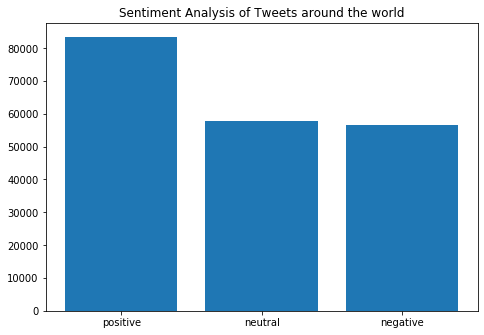

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
data = scores_df["result"].value_counts()
# get x and y data 
points = data.index
frequency = data.values
#plot graph
ax.bar(points,frequency)
plt.title("Sentiment Analysis of Tweets around the world")
plt.show()

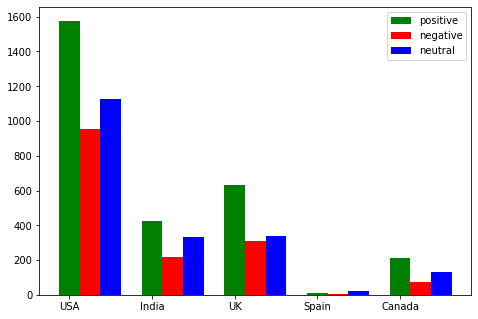

In [19]:
data = [[score_us_positive,score_india_positive, score_uk_positive, score_spain_positive, score_canada_positive],
[score_us_negative,score_india_negative, score_uk_negative, score_spain_negative, score_canada_negative],
[score_us_neutral,score_india_neutral, score_uk_neutral, score_spain_neutral, score_canada_neutral]]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(["USA","India","UK","Spain","Canada"])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25, label="positive")
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25, label="negative")
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25, label="neutral")
plt.legend(loc="upper right")
plt.show()

In [20]:
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
pos_word_weight=[]
neu_word_weight=[]
neg_word_weight=[]

def get_word_sentiment(text):
    
    tokenized_text = nltk.word_tokenize(text)
    #print(tokenized_text)    

    for word in tokenized_text:
            if (s.polarity_scores(word)['compound']) >= 0.6:
                pos_word_list.append(word)
                pos_word_weight.append(s.polarity_scores(word)['compound'])
            elif (s.polarity_scores(word)['compound']) <= -0.6:
                neg_word_list.append(word)
                neg_word_weight.append(s.polarity_scores(word)['compound'])
            else:
                neu_word_list.append(word)
                neu_word_weight.append(s.polarity_scores(word)['compound'])

for tweet in tweets["text"]:
    get_word_sentiment(tweet)

In [21]:
print('Total Positive Words in Tweets:',len(pos_word_list))
print('Total Negative Words in Tweets:',len(neg_word_list))
print('Total Neutral Words in Tweets:',len(neu_word_list))

Total Positive Words in Tweets: 9802
Total Negative Words in Tweets: 7194
Total Neutral Words in Tweets: 3179193


In [22]:
pos_word_list = list(set(pos_word_list))
neg_word_list = list(set(neg_word_list))
neu_word_list = list(set(neu_word_list))

result_pos = dict(zip(pos_word_list, pos_word_weight))
result_neg = dict(zip(neg_word_list, neg_word_weight))
result_neu = dict(zip(neu_word_list, neu_word_weight))

features_pos = []
vals_pos = []

features_neg = []
vals_neg = []

features_neu = []
vals_neu = []

for key, value in sorted(result_pos.items(), key = itemgetter(1), reverse = True):
    features_pos.append(key)
    vals_pos.append(value)
for key, value in sorted(result_neg.items(), key = itemgetter(1), reverse = True):
    features_neg.append(key)
    vals_neg.append(value)
for key, value in sorted(result_neu.items(), key = itemgetter(1), reverse = True):
    features_neu.append(key)
    vals_neu.append(value)

top_positive_words = features_pos[:10]
top_positive_words_freq = vals_pos[:10]

top_negative_words = features_neg[:10]
top_negative_words_freq = vals_neg[:10]

top_neutral_words = features_neu[:10]
top_neutral_words_freq = vals_neu[:10]


print(top_positive_words)
print(top_negative_words)
print(top_neutral_words)

['hallelujah', 'euphoria', 'superb', 'ilu', 'best', 'brightest', 'aml', 'sweetheart', 'glee', 'amor']
['evil', 'rapist', 'terrorist', 'faggot', 'dickhead', 'fucker', 'shittiest', 'twat', 'devil', 'heartbroken']
['elishifa', 'igm', 'ladyvelvet', 'epitheli', 'lisakitchen', 'pembrokeshir', 'cincyjon', 'inforum', 'shauryadjoshi', 'bigbang']


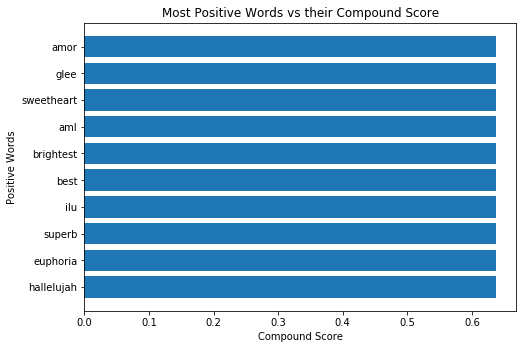

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# get x and y data 
points = top_positive_words
frequency = top_positive_words_freq
#plot graph
ax.barh(points,frequency)
plt.title("Most Positive Words vs their Compound Score")
plt.xlabel("Compound Score")
plt.ylabel("Positive Words")
plt.show()

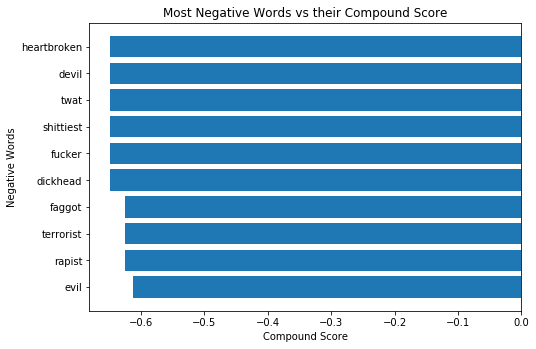

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# get x and y data 
points = top_negative_words
frequency = top_negative_words_freq
#plot graph
ax.barh(points,frequency)
plt.title("Most Negative Words vs their Compound Score")
plt.xlabel("Compound Score")
plt.ylabel("Negative Words")
plt.show()

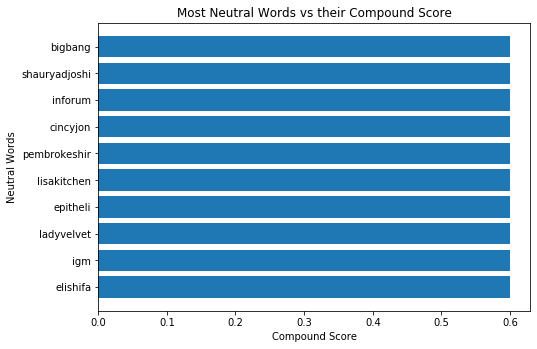

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# get x and y data 
points = top_neutral_words
frequency = top_neutral_words_freq
#plot graph
ax.barh(points,frequency)
plt.title("Most Neutral Words vs their Compound Score")
plt.xlabel("Compound Score")
plt.ylabel("Neutral Words")
plt.show()